In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

ER随机网络的结构特性

In [2]:
# 绘制不同规模随即网络的度分布
# 定义求度分布的函数
def get_pdf(G, kmin, kmax):
    k = list(range(kmin, kmax + 1)) # 获取所有可能的度值
    N = len(G.nodes())

    Pk = []
    for ki in k:
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:
                c += 1
        Pk.append(c/N)

    return k, Pk


In [5]:
samples = 100 # 统计平均
N = [100, 1000]
# 为了方便统计平均，指定区间[20, 80]
kmin, kmax, avk = 20, 80, 50
s1 = np.zeros(kmax-kmin+1)
s2 = np.zeros(kmax-kmin+1)
for i in range(samples):
    ER1 = nx.gnp_random_graph(N[0], avk/N[0])
    x1, y1 = get_pdf(ER1, kmin, kmax)
    ER2 = nx.gnp_random_graph(N[1], avk/N[1])
    x2, y2 = get_pdf(ER2, kmin, kmax)

    s1 += np.array(y1)
    s2 += np.array(y2)

# 计算二项分布理论值
n = 100
p = 0.5
k = np.arange(20, 81)
pk_b = stats.binom.pmf(k, n, p)

# 计算泊松分布的理论值
pk_p = [np.exp(-avk)*(avk**ki)/math.factorial(ki) for ki in range(kmin, kmax+1)]



(20, 80)

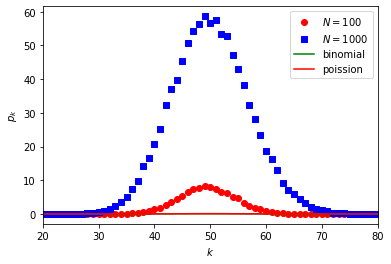

In [6]:
plt.figure(figsize=(6,4))
plt.plot(x1, s1/samples, "ro", label="$N = 100$")
plt.plot(x2, s2/samples, "bs", label="$N = 1000$")
plt.plot(x2, pk_b, "g-", label="binomial")
plt.plot(x2, pk_p, "r-", label="poission")
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([20,80])

测量绘制真实网络的度分布

In [7]:
import pandas as pd
from decimal import Decimal

In [8]:
# 加载三个真实数据集
df1 = pd.read_csv("router_internet.csv")
G1 = nx.from_pandas_edgelist(df1, "source", "target", create_using=nx.Graph())

df2 = pd.read_csv("citation.csv")
G2 = nx.from_pandas_edgelist(df2, "source", "target", create_using=nx.Graph())

df3 = pd.read_csv("protein_interaction.csv")
G3 = nx.from_pandas_edgelist(df3, "source", "target", create_using=nx.Graph())

print(len(G1.nodes()), len(G2.nodes()), len(G3.nodes()))

192244 23133 2018


In [9]:
deg1 = [G1.degree(i) for i in G1.nodes()]
kmin1, kmax1 = min(deg1), max(deg1)

deg2 = [G2.degree(i) for i in G2.nodes()]
kmin2, kmax2 = min(deg2), max(deg2)

deg3 = [G3.degree(i) for i in G3.nodes()]
kmin3, kmax3 = min(deg3), max(deg3)

In [10]:
k1, Pk1 = get_pdf(G1, kmin1, kmax1)
k2, Pk2 = get_pdf(G2, kmin2, kmax2)
k3, Pk3 = get_pdf(G3, kmin3, kmax3)

In [ ]:
# 绘制度分布
avk1 = sum(deg1)/len(G1.nodes())
avk2 = sum(deg2)/len(G2.nodes())
avk3 = sum(deg3)/len(G3.nodes())

pk_p1 = [Decimal(np.exp(-avk1))*(Decimal(avk1)**Decimal(ki))/Decimal(np.math.factorial(ki)) for ki in range(kmin, kmax+1))]

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(k1, Pk1, "ro", label="Internet")
plt.plot(list(range(kmin1, kmax1+1)), pk_p1, "g-", label="poisson")
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-6,1])
plt.xscale("log")
plt.yscale("log")

plt.subplot(132)
plt.plot(k2, Pk2, "ro", label="collaboration")
plt.plot(list(range(kmin2, kmax2+1)), pk_p2, "g-", label="poisson")
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-6,1])
plt.xscale("log")
plt.yscale("log")

plt.subplot(133)
plt.plot(k3, Pk3, "ro", label="protein")
plt.plot(list(range(kmin3, kmax3+1)), pk_p3, "g-", label="poisson")
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-6,1])
plt.xscale("log")
plt.yscale("log")